In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src')
import utils

# Machine Learning Models

Many problems in machine learing seek to build a model

$$g(a; x) \approx y$$

given a data set

$$\{(a_1, y_1), \dots, (a_m, y_m)\},$$

with components
* $a_i \in \mathbf{R}^n$ - data features,
* $y_i \in \mathbf{R}$ or $\{0, 1\}$ - data value or class,
* $g: \mathbf{R}^n \to \mathbf{R}$ or $\{0, 1\}$ - prediction function,
* $x \in \mathbf{R}^n$ - model parameters,
* $m$ - number of data points, and
* $n$ - number of data features.

We can fit a model to the given data by solving an optimization problem of the form

$$\min_x \sum_{i=1}^m f_i(g(a_i; x), y_i) + r(x)$$

with components
* $x \in \mathbf{R}^n$ - model parameters,
* $f_i: \mathbf{R}^n \to \mathbf{R}$ - functions that measure how well the model fits the data for a given set of parameters, and
* $r(x): \mathbf{R}^n \to \mathbf{R}$ - regularization function.

# Linear Regression

In the linear regression problem, we would like to find a linear predictor

$$g(a_i; x) = x_1 a_{i1} + \dots + x_n a_{in} = a_i^T x \approx y_i,$$

where both $a_i$ and $y_i$ are continuous.
One approach for deriving the [loss functions](https://en.wikipedia.org/wiki/Loss_function) $f_i$ is to assume a statistical model for the error in the data set, and then develop a [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) formulation.
Here we will assume that errors are independently drawn from a normal distribution with mean zero and variance $\sigma^2$, that is, 

$$y_i = a_i^Tx + \epsilon_i, \quad \epsilon_i \sim \mathcal{N}(0, \sigma^2).$$

This means that the probability density function for an observation $(a_i, y_i)$ given model parameters $x$ is

$$p((a_i, y_i); x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - a_i^Tx)^2}{2\sigma^2}\right),$$

and the PDF of all $m$ i.i.d. observations is

\begin{align}
p\big(\{(a_1, y_1), \dots, (a_m, y_m)\}; x\big) &= \prod_{i=1}^m p((a_i, y_i); x) \\
&= \prod_{i=1}^m \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - a_i^Tx)^2}{2\sigma^2}\right) \\
&= \left(\frac{1}{2\pi\sigma^2}\right)^{m/2} \exp\left(-\frac{\sum_{i=1}^m (y_i - a_i^Tx)^2}{2\sigma^2}\right).
\end{align}

Alternatively, we can consider the likelihood of a set of model parameters given our $m$ observations, 

$$\mathcal{L}\big(x; \{(a_1, y_1), \dots, (a_m, y_m)\}\big) = p\big(\{(a_1, y_1), \dots, (a_m, y_m)\}; x\big),$$

so that we can solve an optimization problem to find the parameters with the maximum likelihood. In practice, this is often done by minimizing the negative log-likelihood, which, ignoring the constant coefficient, results in our linear least-squares problem

$$\min_x \sum_{i=1}^m(y_i - a_i^Tx)^2.$$

# Regularization

Many problems in machine learning add a [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) term $r(x)$ to the objective function as a means of
* improving the condition number of ill-posed problems,
* incorporating prior knowledge (e.g., smoothness or sparsity), or
* preventing [overfitting](https://en.wikipedia.org/wiki/Overfitting).

Here are some examples of commonly used regularization functions:
* [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)) - $\lambda \|x\|_1$
* [Ridge regression (Tikhonov regularization)](https://en.wikipedia.org/wiki/Tikhonov_regularization) - $\lambda \|x\|_2^2$
* [Elastic net](https://en.wikipedia.org/wiki/Elastic_net_regularization) - $\lambda_1 \| x \|_1 + \lambda_2 \|x\|_2^2$
* [Total variation](https://en.wikipedia.org/wiki/Total_variation_denoising) - $\lambda \|x\|_{TV}$
* [Early stopping](https://en.wikipedia.org/wiki/Early_stopping)

Here we will focus on the Lasso problem

$$\min_x \frac{1}{2} \|Ax - y\|_2^2 + \lambda \|x\|_1,$$

which is used to find sparse solutions (e.g., few nonzeros in $x$).

# Proximal Gradient Descent

Because the 1-norm isn't smooth (the absolute value function isn't differentiable at zero), we need to modify the gradient descent algorithm before we can use it to solve the Lasso problem.
One approach is to combine the gradient step of the differentiable least-squares term with the [proximal operator](https://en.wikipedia.org/wiki/Proximal_operator)

$$\text{prox}_r(x) = \text{argmin}_y \frac{1}{2} \| y - x \|_2^2 + r(y),$$

which generalizes the projection operator.
For input $x$, the prox computes output $y$ that is both small with respect to the regularizer, while at the same time being close to $x$.
When $r$ is the [0-$\infty$ indicator function](https://en.wikipedia.org/wiki/Characteristic_function_(convex_analysis)) of a set, the prox returns the projection of $x$ onto the set.

For an optimization problem

$$\min_x f(x) + r(x),$$

where $f$ is convex and differentiable, and $r$ is convex but possibly not differentiable, the [proximal gradient descent](https://en.wikipedia.org/wiki/Proximal_gradient_methods_for_learning) algorithm with initial guess $x^0$ and step size $\alpha$ is:

> **input** $x^0$, $\alpha$  
> **set** $k = 0$  
> **while** not converged **do**  
> &nbsp;&nbsp;&nbsp;&nbsp;$x^{k+1} \leftarrow \text{prox}_{\lambda r}\Big(x^k - \alpha \nabla f(x^k)\Big)$  
> &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$  
> **end while**

The prox of the 1-norm is known as the soft-thresholding operator, and can be computed elementwise:

$$\Big(\text{prox}_{\lambda \|\cdot\|_1}(x)\Big)_i = \begin{cases} x_i - \lambda & x_i > \lambda \\ 0 & |x_i| \leq \lambda \\ x_i + \lambda & x_i < -\lambda \end{cases}$$

Proximal gradient descent for 1-norm regularized problems is also refered to as an iterative soft-thresholding algorithm or an iterative shrinkage-thresholding algorithm (ISTA).
As seen in the plot below, the soft-thresholding operator encourages sparsity by setting small elements of the input to zero, while reducing the magnitude of the rest.
This effect becomes more pronounced as the parameter $\lambda$ is increased.

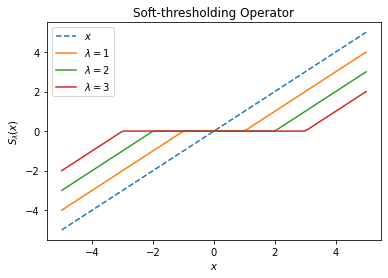

In [2]:
x = np.linspace(-5, 5, 100)
plt.plot(x, x, '--')
plt.plot(x, utils.prox(x, 1))
plt.plot(x, utils.prox(x, 2))
plt.plot(x, utils.prox(x, 3))
plt.xlabel('$x$')
plt.ylabel('$S_{\lambda}(x)$')
plt.title('Soft-thresholding Operator')
plt.legend(['$x$', '$\lambda = 1$', '$\lambda = 2$', '$\lambda = 3$']);

# Exercise 1: Sparse Signal Recovery

Suppose we want to solve a linear regression problem where we know that the true solution should be sparse.
Without any regularization ($\lambda = 0$), we are able to find a low function value, but we cannot correctly identify the nonzero model parameters. In the example below, experiment with the size of $\lambda$ to answer the following questions:
* Using regularization parameters 0, 0.1, 1, 10, and 100, fill out the table below. Can you find a relationship between $\lambda$, the minimum function value, and the number of nonzero elements in the solution?

$\lambda$ | $f(x)$ | # nonzeros
-|-|-
0 |  |
0.01 |  |
0.1 |  |
1 |  |
10 |  |
100 |  |

* From the table, which value of $\lambda$ did the best job at approximating the true number (14) of nonzero elements in the solution?
* From the plot, which value of $\lambda$ did the best job at approximating the true value of the nonzero elements in the solution?

In [3]:
m = 50; n = 128; k = 14
np.random.seed(0)
A = np.random.randn(m,n)
p = np.random.permutation(n)[:k]
x_true = np.zeros(n)
x_true[p] = np.random.randn(k)
y = A.dot(x_true)

Converged after 234 iteration(s).
Minimum function value: 0.00
Total time: 0.04 secs
Number of nonzeros: 128


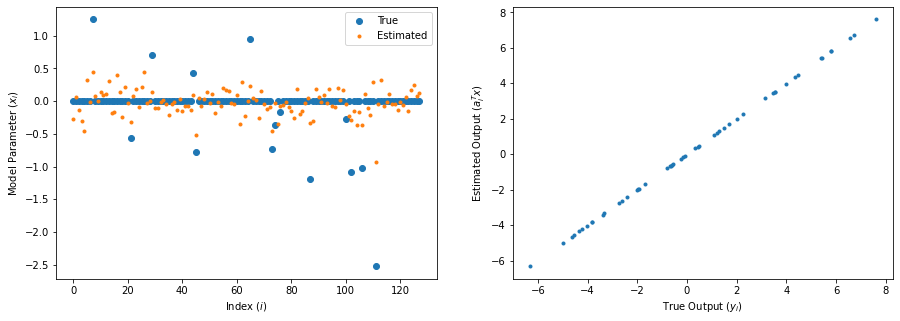

In [4]:
lam = 0 # modify this variable
results = utils.prox_descent(A, y, lam=lam)
print(f'Number of nonzeros: {np.count_nonzero(results[0])}')
utils.plot_pgd1(A, x_true, y, results)

Below, we can see the results for a wider range of regularization parameters, with similar results:
* For small $\lambda$, the least-squares term dominates the objective function, so we get low model error but dense solution vectors.
* For large $\lambda$, the regularization term dominates the objective function, so we have sparser solutions but higher model error.

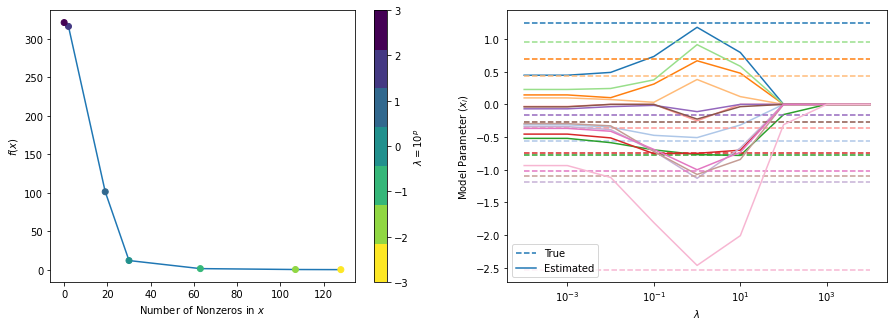

In [5]:
utils.plot_lam1(A, y, x_true, lam_vals=10.**np.arange(-4, 5))

The regularization parameter $\lambda$ is an example of a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)), a value related to the learing process rather than the model itself.
We have already seen a few examples of hyperparameters in the previous notebook: the step size in gradient descent, and the mini-batch size and decay parameter for the learning rate schedule in stochastic gradient descent.
While tuning hyperparameters can sometimes feel like an art form, there are a variety of [methods](https://en.wikipedia.org/wiki/Hyperparameter_optimization) that can make the process easier and more systematic.

# Exercise 2: Dictionary Learning

Suppose we would like to fit a nonlinear model to some data, but we don't know which functions to use.
For example, we may suspect that our data was generated by a sum of cosines, but we don't know how many terms to use or their frequencies.
Our goal will be to fit the model

$$g(x_i; a, b) = \sum_{j=1}^k a_j \cos(b_jx_i),$$

for a given set of points $(x_i, y_i)$, where $k$, $a_j$, and $b_j$ are unknown.
Note that in this example, we have changed notation so that scalars $x_i$ are input, while vectors $a$ and $b$ are model parameters.

For this example, we will split our data into a training set $(x_{train}, y_{train})$ and a test set $(x_{test}, y_{test})$.
We will fit our model parameters using the training set, and then we will compare our model error on both the training set and test set.
This will give us an idea of not only how well our model fits the given data, but also how well our model generalizes to new data.

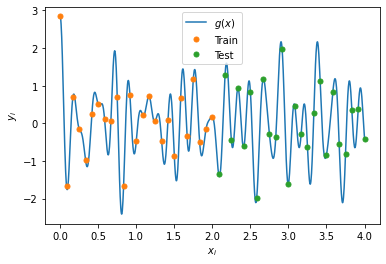

In [6]:
n = 50; m = 25; k = 5
np.random.seed(0)
a = np.random.rand(k); b = np.random.choice(n, k, replace=False)
x_train = np.linspace(0, 2, m); y_train = utils.g(x_train, a, b)
x_test = np.linspace(2, 4, m)[1:]; y_test = utils.g(x_test, a, b)
plt.plot(np.linspace(0, 4, 1000), utils.g(np.linspace(0, 4, 1000), a, b))
plt.plot(x_train, y_train, '.', markersize=10)
plt.plot(x_test, y_test, '.', markersize=10)
plt.xlabel('$x_i$')
plt.ylabel('$y_i$')
plt.legend(['$g(x)$', 'Train', 'Test']);

Even though our model $g$ is nonlinear, we can use linear least-squares to estimate parameter vectors $a$ and $b$ by first creating dictionary matrix $D$ that contains cosine evaluated at our data for various candidate frequencies $b_i$:

$$D = \begin{bmatrix}
    \cos(b_1 x_1) & \cos(b_2 x_1) & \dots & \cos(b_n x_1) \\
    \cos(b_1 x_2) & \cos(b_2 x_2) & \dots & \cos(b_n x_2) \\
    \vdots & \vdots & \ddots & \vdots \\
    \cos(b_1 x_m) & \cos(b_2 x_m) & \dots & \cos(b_n x_m)
\end{bmatrix}$$

Now we can evaluate $g$ at our data for estimated coefficients $a_i$ using the matrix-vector product $Da$.

In [7]:
D = np.array([np.cos(ii*x_train) for ii in range(n)]).T

Since we expect that $g$ only has a few terms, we will solve the Lasso problem

$$\min_a \frac{1}{2} \|Da - y \|_2^2 + \lambda \| a \|_1$$

to find a sparse vector of coefficients $a_i$.

* Using regularization parameters 0, 0.1, 1, and 10, fill out the table below. Can you find a relationship between $\lambda$, the minimum function value, the function value on the test set, and the number of nonzero elements in the solution?

$\lambda$ | $f(x_{train})$ | $f(x_{test})$ | # terms
-|-|-|-
0 |  |  | 
0.01 |  |  | 
0.1 |  |  | 
1 |  |  | 
10 |  |  | 

* From the table, which value of $\lambda$ did the best job at approximating the true number (5) of terms?
* From the plot, which value of $\lambda$ did the best job at approximating the true value of the nonzero elements in the solution?
* From the plot, which value of $\lambda$ did the best job at predicting new data?

Converged after 45 iteration(s).
Minimum function value: 0.00
Total time: 0.01 secs
Function value on test set: 10.92
Number of terms: 50


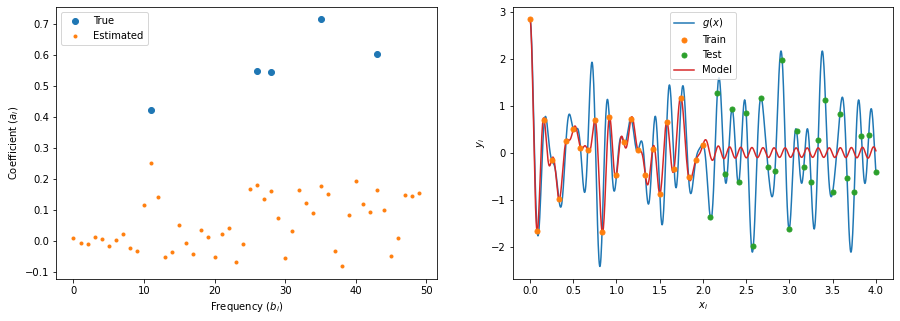

In [8]:
lam = 0 # modify this parameter
results = utils.prox_descent(D, y_train, lam=lam)
f_test = np.linalg.norm(utils.g(x_test, results[0]) - y_test)**2/2 + lam*np.linalg.norm(results[0], 1)
print(f'Function value on test set: {f_test:.2f}')
print(f'Number of terms: {np.count_nonzero(results[0])}')
utils.plot_pgd2(a, b, x_train, y_train, x_test, y_test, results)

Below, we can see the results for a wider range of regularization parameters, with similar results:
* For small $\lambda$, the least-squares term dominates the objective function, so we get low model error on the training data but dense coefficient vectors. This is an example of overfitting: by using more terms, our model fits the training data extremely well, but it cannot generalize to new data, so we have high model error on the test data.
* For large $\lambda$, the regularization term dominates the objective function, so we have sparser coefficient vectors but higher model error on both the training and test data. This is an example of underfitting: we don't have enough terms, so our model cannot predict any of our data well.
* The best trade-off occurs where our test error achieves its minimum value.

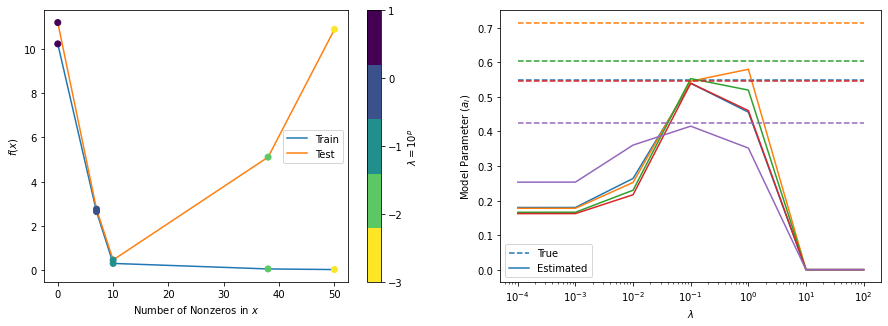

In [9]:
utils.plot_lam2(D, a, b, x_train, y_train, x_test, y_test, lam_vals=10.**np.arange(-4, 3))